# Create a word cloud from the Iliad
First attempts with Latin

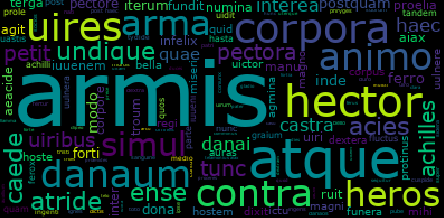

## Load the text

In [3]:
file = open("/Users/danjane/cltk_data/latin/text/latin_text_latin_library/ilias.txt", "r") 
text = file.read()
print (text[80:100])

 Diua, superbi 
Tris


## Normalization
Normalization is not exciting, but still an important task in NLP. The CLTK offers help for Greek, Latin, Sanskrit, and Egyptian.

To count words capitalization is not important, so we lower all the characters.

## Latin
One of the most common issues is the use of "j" and "v" (for "i" and "u", respectively) before vowels. See http://docs.cltk.org/en/latest/latin.html#converting-j-to-i-v-to-u.

In [13]:
# Replace j/v and tokenize

from cltk.stem.latin.j_v import JVReplacer
from cltk.tokenize.word import WordTokenizer

jv_replacer = JVReplacer()
text = jv_replacer.replace(text.lower())

word_tokenizer = WordTokenizer('latin')
text_word_tokens = word_tokenizer.tokenize(text)
text_word_tokens = [token for token in text_word_tokens if token not in ['.', ',', ':', ';','*']]

# Keep words more than 3 characters long
text_word_tokens = [token for token in text_word_tokens if len(token) > 3]

# Quick check, printing the first 10 words
print(text_word_tokens[:90])

['ilias', 'latina', 'ilias', 'latina', 'iram', 'pande', 'mihi', 'pelidae', 'diua', 'superbi', 'tristia', 'quae', 'miseris', 'iniecit', 'funera', 'grais', 'atque', 'animas', 'fortes', 'heroum', 'tradidit', 'orco', 'latrantum', 'dedit', 'rostris', 'uolucrum', 'trahendos', 'illorum', 'exsangues', 'inhumatis', 'ossibus', 'artus', 'confiebat', 'enim', 'summi', 'sententia', 'regis', 'protulerant', 'discordia', 'pectora', 'pugnas', 'sceptriger', 'atrides', 'bello', 'clarus', 'achilles', 'quis', 'deus', 'tristi', 'contendere', 'iussit', 'latonae', 'magni', 'proles', 'iouis', 'ille', 'pelasgum', 'infestam', 'regi', 'pestem', 'praecordia', 'misit', 'implicuit', 'graui', 'danaorum', 'corpora', 'morbo', 'quondam', 'chryses', 'sollemni', 'tempora', 'uitta', 'implicitus', 'raptae', 'fleuit', 'solacia', 'natae', 'inuisos', 'dies', 'inuisa', 'tempora', 'noctis', 'egit', 'assiduis', 'impleuit', 'questibus', 'auras', 'postquam', 'nulla', 'dies']


In [17]:
# Change back to text
text = ','.join(text_word_tokens)
print(text[:500])

ilias,latina,ilias,latina,iram,pande,mihi,pelidae,diua,superbi,tristia,quae,miseris,iniecit,funera,grais,atque,animas,fortes,heroum,tradidit,orco,latrantum,dedit,rostris,uolucrum,trahendos,illorum,exsangues,inhumatis,ossibus,artus,confiebat,enim,summi,sententia,regis,protulerant,discordia,pectora,pugnas,sceptriger,atrides,bello,clarus,achilles,quis,deus,tristi,contendere,iussit,latonae,magni,proles,iouis,ille,pelasgum,infestam,regi,pestem,praecordia,misit,implicuit,graui,danaorum,corpora,morbo,q


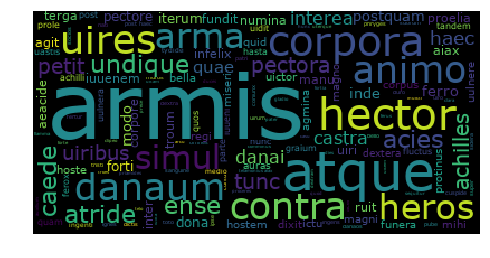

In [40]:
## Simple WordCloud
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8, 5]

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'quem','ille'} # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(text)